In [52]:
import pandas as pd
import numpy as np
import sklearn as sk

df = pd.read_csv("/content/drive/MyDrive/Dataanalysis/obiligation(Dacon)/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Dataanalysis/obiligation(Dacon)/test.csv")

df[df.duplicated()]
df.isnull().sum()
test_df.isnull().sum()

,0
UID,0
주거 형태,0
연간 소득,0
현재 직장 근속 연수,0
체납 세금 압류 횟수,0
개설된 신용계좌 수,0
신용 거래 연수,0
최대 신용한도,0
신용 문제 발생 횟수,0
마지막 연체 이후 경과 개월 수,0


## 1. EDA

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot 한글 깨짐
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/*

import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


(1) 범주형 변수

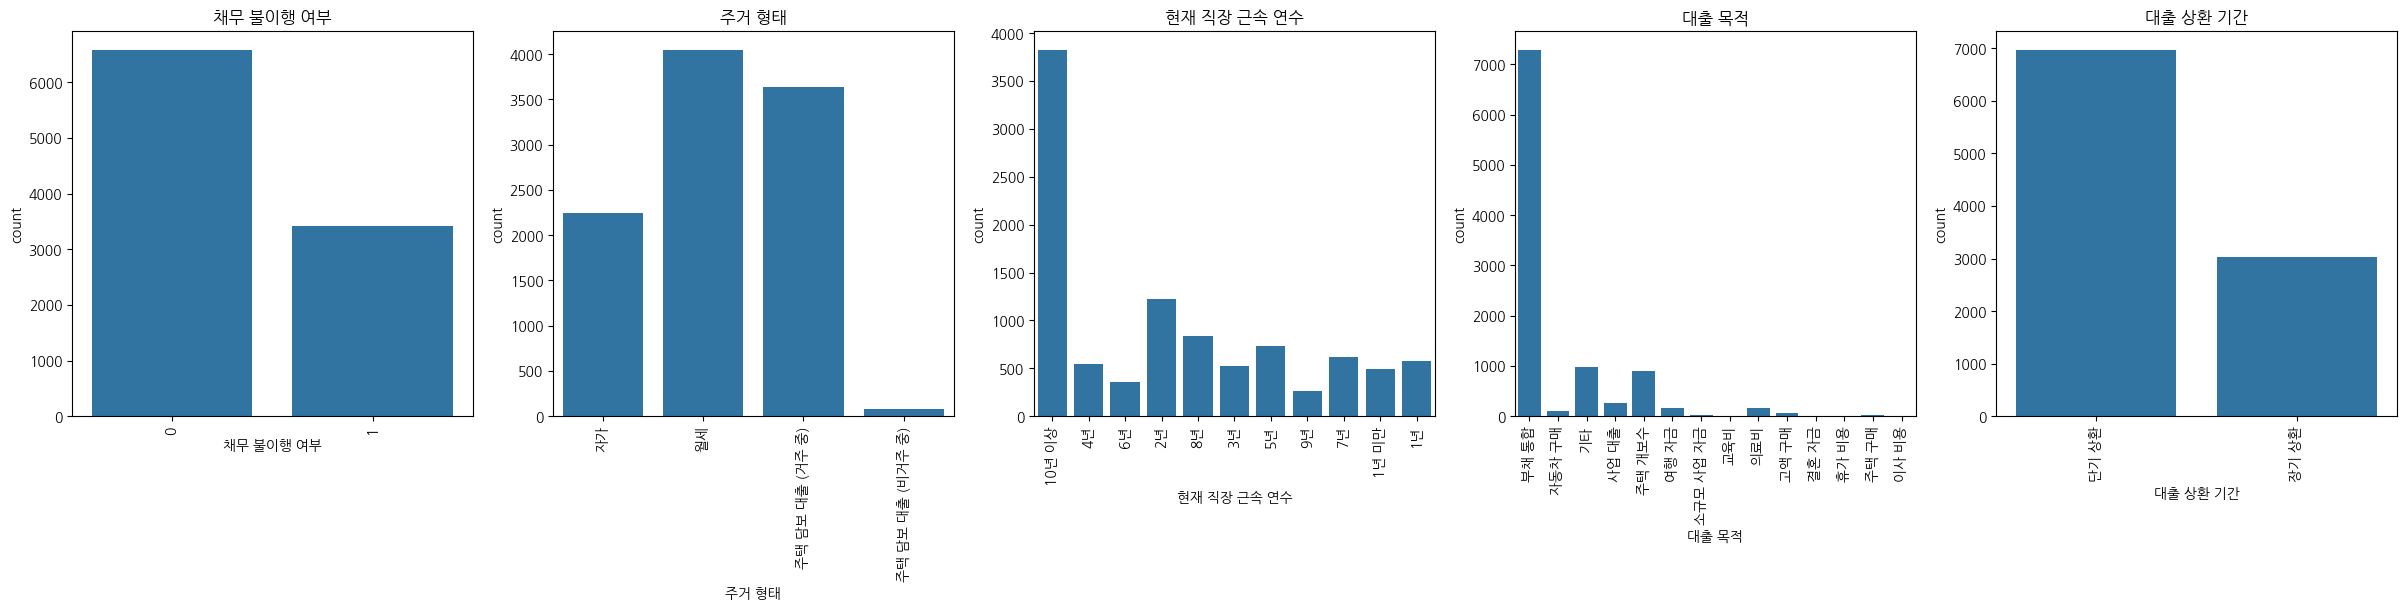

In [26]:
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
sns.countplot(x='채무 불이행 여부', data=df)
plt.xticks(rotation = 90)
plt.title('채무 불이행 여부')

plt.subplot(1,5,2)
sns.countplot(x='주거 형태', data=df)
plt.xticks(rotation = 90)
plt.title('주거 형태')

plt.subplot(1,5,3)
sns.countplot(x='현재 직장 근속 연수', data=df)
plt.xticks(rotation = 90)
plt.title('현재 직장 근속 연수')

plt.subplot(1,5,4)
sns.countplot(x='대출 목적', data=df)
plt.xticks(rotation = 90)
plt.title('대출 목적')

plt.subplot(1,5,5)
sns.countplot(x='대출 상환 기간', data=df)
plt.xticks(rotation = 90)
plt.title('대출 상환 기간')
plt.show()

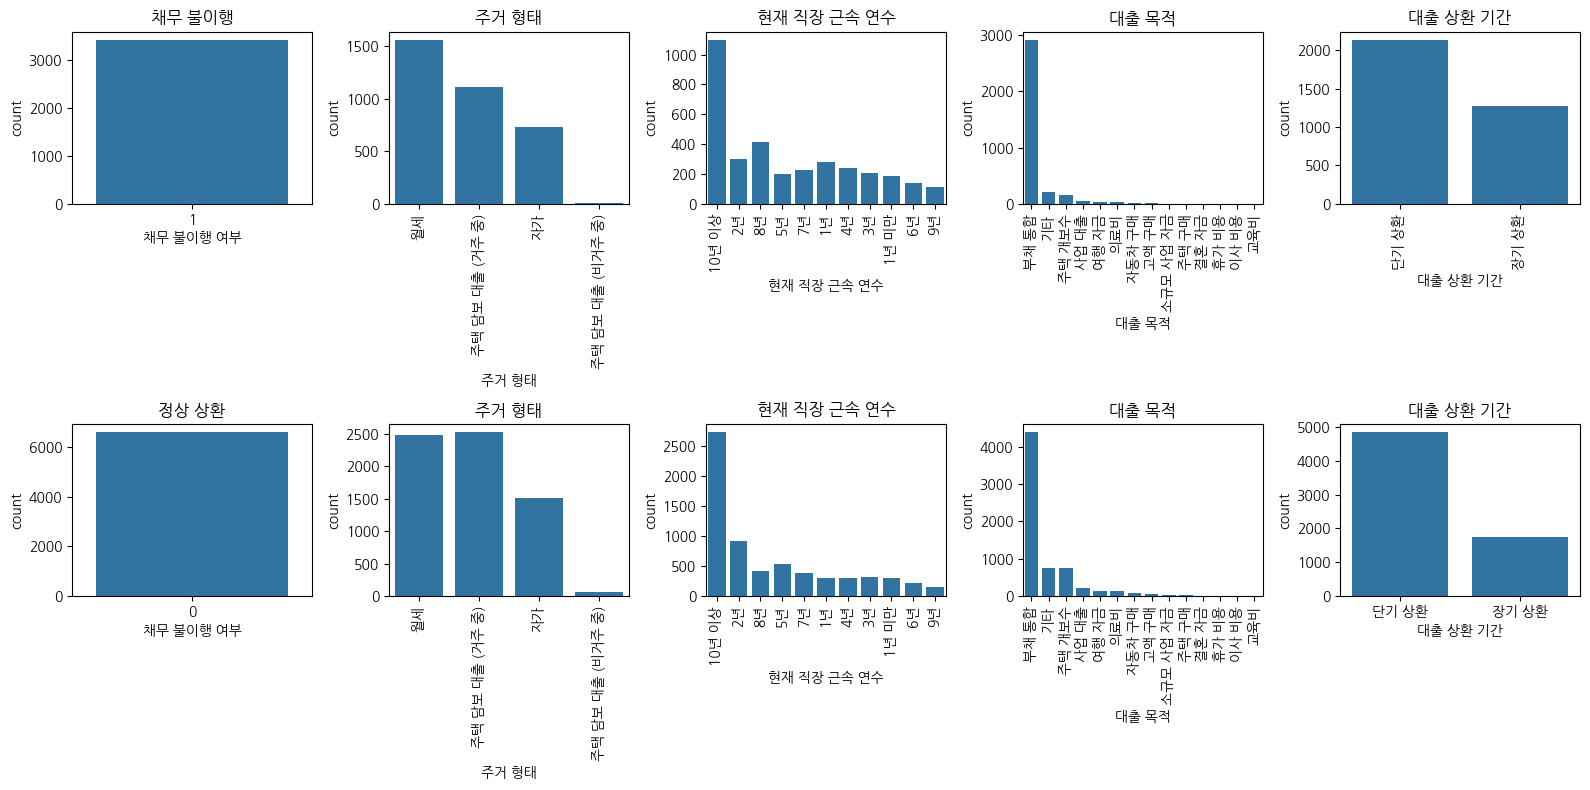

In [27]:
plt.figure(figsize=(16,8))

plt.subplot(2,5,1)
sns.countplot(x='채무 불이행 여부', data=df[df['채무 불이행 여부']==1])
plt.title('채무 불이행')

plt.subplot(2,5,2)
sns.countplot(x='주거 형태', data=df[df['채무 불이행 여부']==1], order=df['주거 형태'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('주거 형태')

plt.subplot(2,5,3)
sns.countplot(x='현재 직장 근속 연수', data=df[df['채무 불이행 여부']==1], order=df['현재 직장 근속 연수'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('현재 직장 근속 연수')

plt.subplot(2,5,4)
sns.countplot(x='대출 목적', data=df[df['채무 불이행 여부']==1], order=df['대출 목적'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('대출 목적')

plt.subplot(2,5,5)
sns.countplot(x='대출 상환 기간', data=df[df['채무 불이행 여부']==1], order=df['대출 상환 기간'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('대출 상환 기간')

plt.subplot(2,5,6)
sns.countplot(x='채무 불이행 여부', data=df[df['채무 불이행 여부']==0])
plt.title('정상 상환')

plt.subplot(2,5,7)
sns.countplot(x='주거 형태', data=df[df['채무 불이행 여부']==0], order=df['주거 형태'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('주거 형태')

plt.subplot(2,5,8)
sns.countplot(x='현재 직장 근속 연수', data=df[df['채무 불이행 여부']==0], order=df['현재 직장 근속 연수'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('현재 직장 근속 연수')

plt.subplot(2,5,9)
sns.countplot(x='대출 목적', data=df[df['채무 불이행 여부']==0], order=df['대출 목적'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('대출 목적')

plt.subplot(2,5,10)
sns.countplot(x='대출 상환 기간', data=df[df['채무 불이행 여부']==0], order=df['대출 상환 기간'].value_counts().index)
plt.title('대출 상환 기간')

plt.tight_layout()
plt.show()

(2) 수치형 변수

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


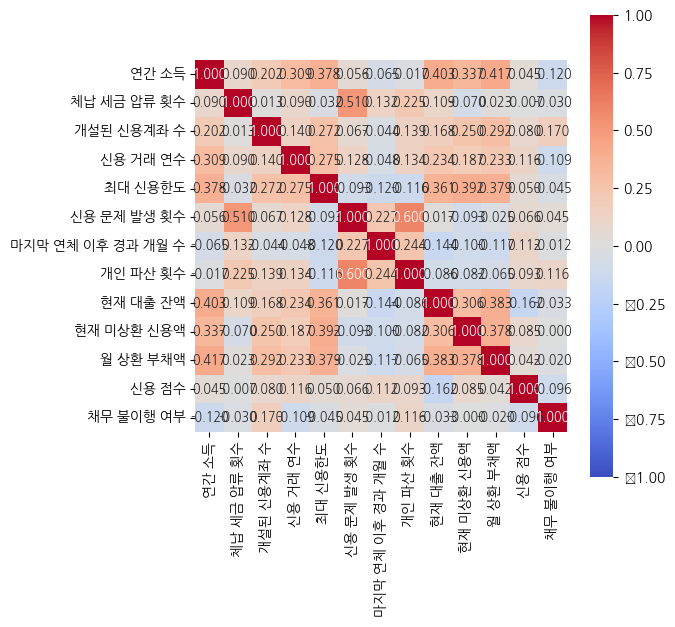

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True),
           annot=True,
           cmap='coolwarm',
           cbar=True, # 옆에 칼라 바 제거
           square=True,
            fmt='.3f', # 소수점
            vmax=1, vmin =-1,
            annot_kws={'size':9}
           )
plt.show()

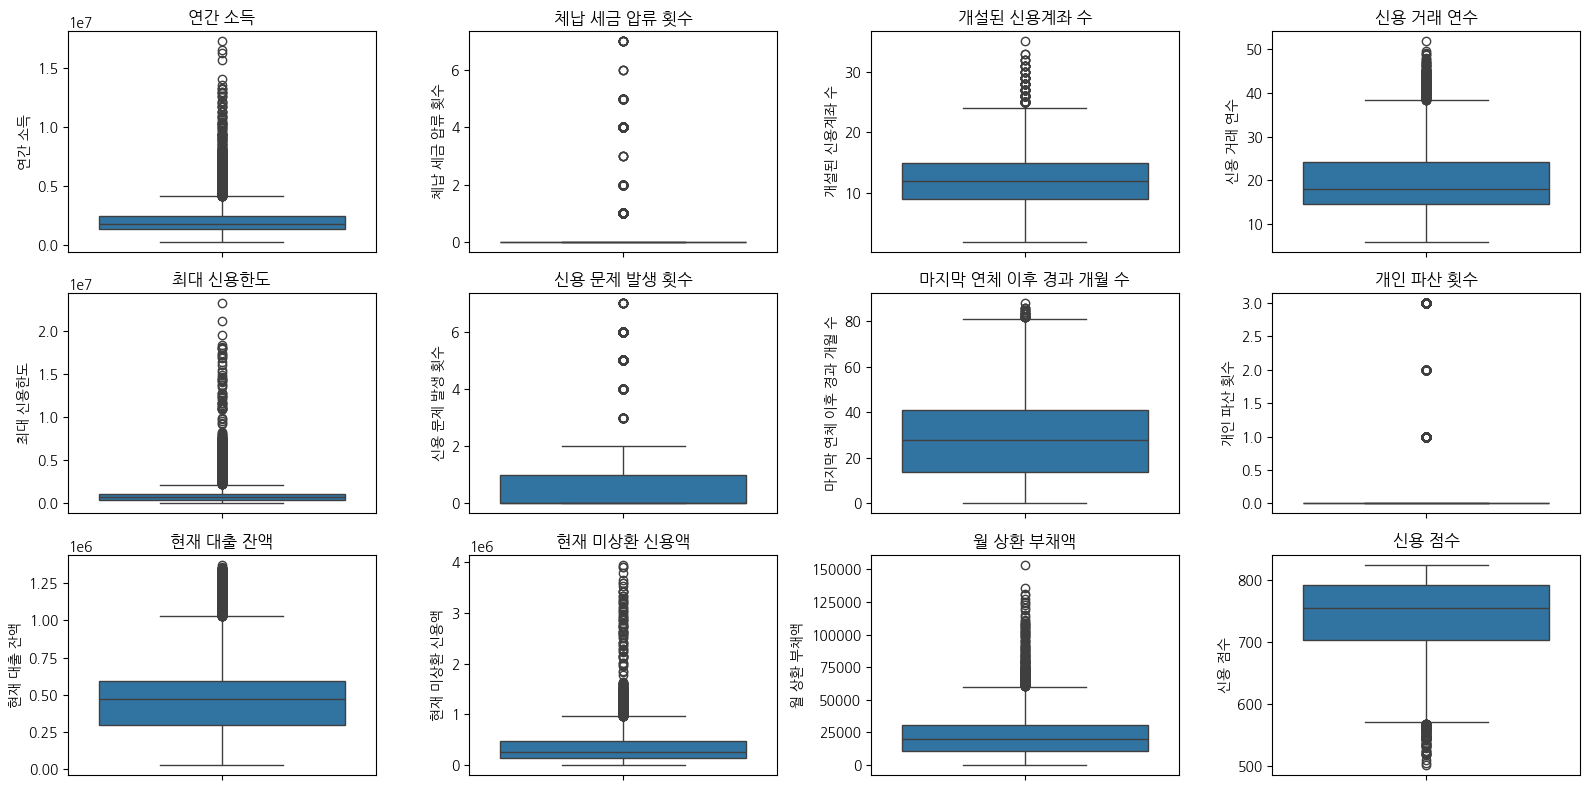

In [29]:
plt.figure(figsize=(16,8))

plt.subplot(3,4,1)
sns.boxplot(y='연간 소득', data=df)
plt.title('연간 소득')

plt.subplot(3,4,2)
sns.boxplot(y='체납 세금 압류 횟수', data=df)
plt.title('체납 세금 압류 횟수')

plt.subplot(3,4,3)
sns.boxplot(y='개설된 신용계좌 수',data=df)
plt.title('개설된 신용계좌 수')

plt.subplot(3,4,4)
sns.boxplot(y='신용 거래 연수',  data=df)
plt.title('신용 거래 연수')

plt.subplot(3,4,5)
sns.boxplot(y='최대 신용한도',  data=df)
plt.title('최대 신용한도')

plt.subplot(3,4,6)
sns.boxplot(y='신용 문제 발생 횟수', data=df)
plt.title('신용 문제 발생 횟수')

plt.subplot(3,4,7)
sns.boxplot(y='마지막 연체 이후 경과 개월 수', data=df)
plt.title('마지막 연체 이후 경과 개월 수')

plt.subplot(3,4,8)
sns.boxplot(y='개인 파산 횟수', data=df)
plt.title('개인 파산 횟수')

plt.subplot(3,4,9)
sns.boxplot(y='현재 대출 잔액', data=df)
plt.title( '현재 대출 잔액')

plt.subplot(3,4,10)
sns.boxplot(y='현재 미상환 신용액', data=df)
plt.title( '현재 미상환 신용액')

plt.subplot(3,4,11)
sns.boxplot(y='월 상환 부채액', data=df)
plt.title('월 상환 부채액')

plt.subplot(3,4,12)
sns.boxplot(y='신용 점수', data=df)
plt.title('신용 점수')

plt.tight_layout()
plt.show()

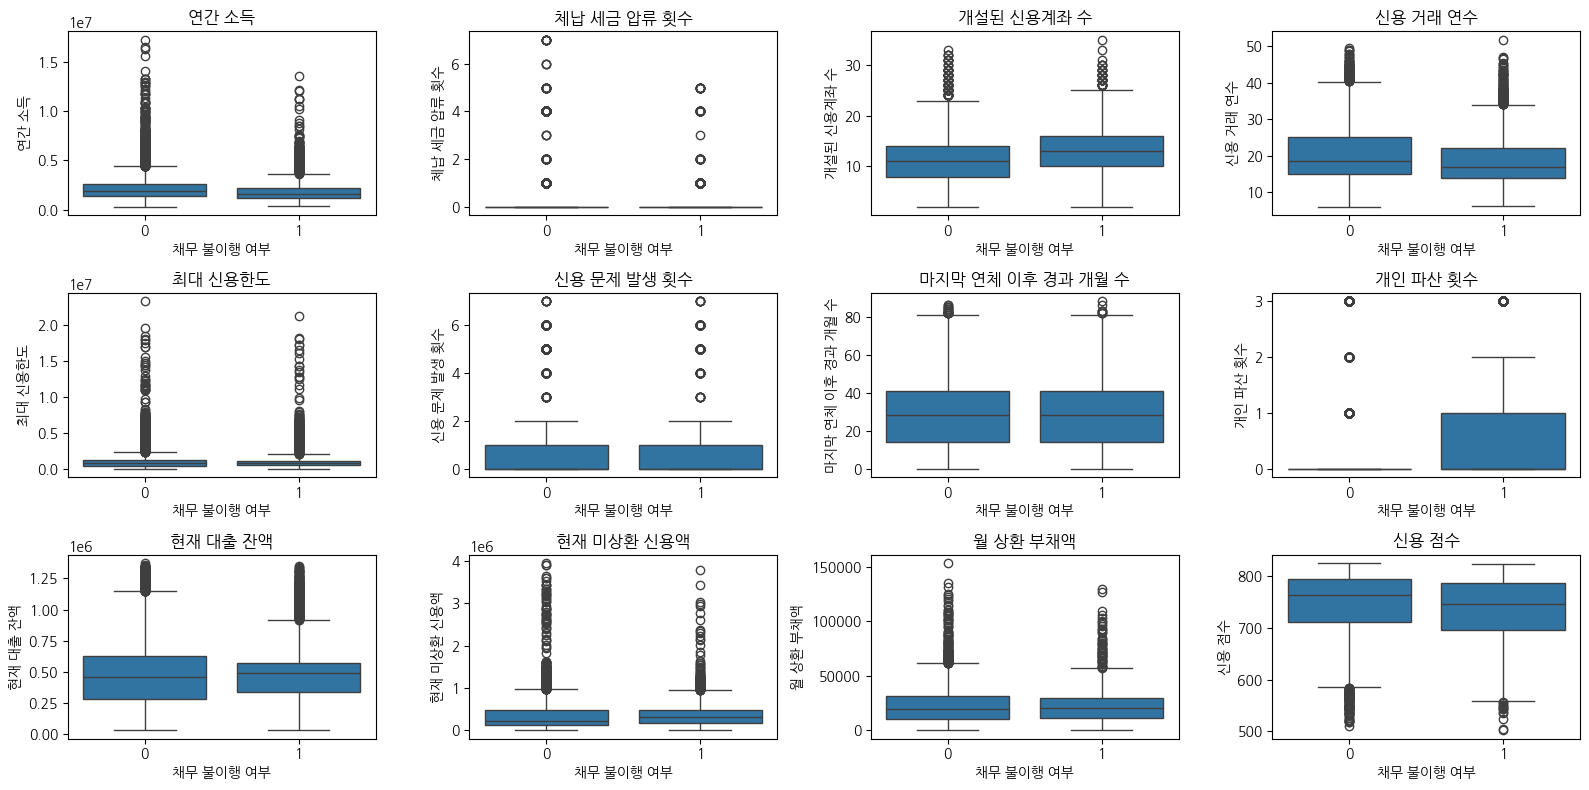

In [30]:
plt.figure(figsize=(16,8))

plt.subplot(3,4,1)
sns.boxplot(y='연간 소득', x='채무 불이행 여부', data=df)
plt.title('연간 소득')

plt.subplot(3,4,2)
sns.boxplot(y='체납 세금 압류 횟수', x='채무 불이행 여부', data=df)
plt.title('체납 세금 압류 횟수')

plt.subplot(3,4,3)
sns.boxplot(y='개설된 신용계좌 수', x='채무 불이행 여부', data=df)
plt.title('개설된 신용계좌 수')

plt.subplot(3,4,4)
sns.boxplot(y='신용 거래 연수', x='채무 불이행 여부', data=df)
plt.title('신용 거래 연수')

plt.subplot(3,4,5)
sns.boxplot(y='최대 신용한도', x='채무 불이행 여부', data=df)
plt.title('최대 신용한도')

plt.subplot(3,4,6)
sns.boxplot(y='신용 문제 발생 횟수', x='채무 불이행 여부', data=df)
plt.title('신용 문제 발생 횟수')

plt.subplot(3,4,7)
sns.boxplot(y='마지막 연체 이후 경과 개월 수', x='채무 불이행 여부', data=df)
plt.title('마지막 연체 이후 경과 개월 수')

plt.subplot(3,4,8)
sns.boxplot(y='개인 파산 횟수', x='채무 불이행 여부', data=df)
plt.title('개인 파산 횟수')

plt.subplot(3,4,9)
sns.boxplot(y='현재 대출 잔액', x='채무 불이행 여부', data=df)
plt.title( '현재 대출 잔액')

plt.subplot(3,4,10)
sns.boxplot(y='현재 미상환 신용액', x='채무 불이행 여부', data=df)
plt.title( '현재 미상환 신용액')

plt.subplot(3,4,11)
sns.boxplot(y='월 상환 부채액', x='채무 불이행 여부', data=df)
plt.title('월 상환 부채액')

plt.subplot(3,4,12)
sns.boxplot(y='신용 점수', x='채무 불이행 여부', data=df)
plt.title('신용 점수')

plt.tight_layout()
plt.show()

## 2. Preprocessing

In [53]:
data = pd.DataFrame()
test_data = pd.DataFrame()

#### 범주형 데이터 변환
##### (1) 대출 상환 기간(단기/장기) -> 더미 데이터 생성
##### (2) 대출 목적 카테고리 4개로 축소 -> 더미 데이터 생성
##### (3) 주거 형태 3개로 축소 -> 더미 데이터 생성


In [54]:
# 1. 대출 상환 기간
df['대출 상환 기간'].unique()
df['대출 상환 기간'].value_counts()
#train
duration = pd.get_dummies(df['대출 상환 기간'], drop_first=True).astype(int) #더미데이터 총 2개 발생 -> 하나만 채택(drop_first)
data['대출 상환 기간_장기'] = duration.iloc[0:10000, 0:1] #-> 1

#test
duration = pd.get_dummies(test_df['대출 상환 기간'], drop_first=True).astype(int) #더미데이터 총 2개 발생 -> 하나만 채택(drop_first)
test_data['대출 상환 기간_장기'] = duration.iloc[0:10000, 0:1] #-> 1

In [55]:
#2. 대출 목적
def biggroup_purpose(purpose) : #'대출 목적' 카테고리 축소(14개 -> 4개)
    if purpose in ['의료비', '결혼 자금', '휴가 비용', '이사 비용', '여행 자금', '교육비', '자동차 구매', '고액 구매'] :
        return '생활비'
    elif purpose in ['주택 개보수', '주택 구매']:
        return '주거'
    elif purpose == '부채 통합':
        return '부채 통합'
    else :
        return '기타'

#train
df['대출 목적'].unique() #14개 카테고리
df['대출 목적'].value_counts()
df['대출 목적'] = df['대출 목적'].apply(biggroup_purpose) #카테고리 축소
purpose_onehot = pd.get_dummies(df['대출 목적'], prefix='대출 목적', drop_first=True).astype(int) #-> 4개(하나 버림)
data = pd.concat([data, purpose_onehot], axis=1)

#test
test_df['대출 목적'] = test_df['대출 목적'].apply(biggroup_purpose) #카테고리 축소
purpose_onehot = pd.get_dummies(test_df['대출 목적'], prefix='대출 목적', drop_first=True).astype(int) #-> 4개(하나 버림)
test_data = pd.concat([test_data, purpose_onehot], axis=1)

In [56]:
#3. 주거 형태
def group_house(house) :
    if house in ['주택 담보 대출 (거주 중)', '주택 담보 대출 (비거주 중)']: #주택 담보 대출 카테고리 통합
        return '주택 담보 대출'
    else :
        return house

#train
df['주거 형태'].unique()
df['주거 형태'].value_counts()
df['주거 형태'] = df['주거 형태'].apply(group_house)
house_onehot = pd.get_dummies(df['주거 형태'], prefix='주거 형태', drop_first=True).astype(int)
data = pd.concat([data, house_onehot], axis=1)

#test
test_df['주거 형태'] = test_df['주거 형태'].apply(group_house)
house_onehot = pd.get_dummies(test_df['주거 형태'], prefix='주거 형태', drop_first=True).astype(int)
test_data = pd.concat([test_data, house_onehot], axis=1)

#### 파생변수 생성
##### (1) 자금 문제 발생 횟수 = 체납 세금 압류 횟수 + 신용 문제 발생 횟수 + 개인 파산 횟수
##### (2) 위험수준 : 자금 문제 발생 횟수 기준으로 범주화
##### (3) 미상환 금액 평균 = (현재 대출 잔액 + 현재 미상환 신용액)/2 - 월 상환 부채액
##### (4) 연간 개설 계좌 수 = 개설된 신용계좌 수 / 신용 거래 연수

In [57]:
data['자금 문제 발생 횟수'] = df['체납 세금 압류 횟수'] + df['신용 문제 발생 횟수'] + df['개인 파산 횟수']
test_data['자금 문제 발생 횟수'] = test_df['체납 세금 압류 횟수'] + test_df['신용 문제 발생 횟수'] + test_df['개인 파산 횟수']

In [58]:
def calculate_risk(problem) :
    if problem < 1 :
        return 0 #'안정군'
    elif problem < 3 :
        return 1 #'보통군'
    else :
        return 2 #'위험군'

data['위험수준'] = data['자금 문제 발생 횟수'].apply(calculate_risk)
test_data['위험수준'] = test_data['자금 문제 발생 횟수'].apply(calculate_risk)

In [59]:
data['미상환 금액 평균'] = (df['현재 대출 잔액'] + df['현재 미상환 신용액'])/2 - df['월 상환 부채액']
test_data['미상환 금액 평균'] = (test_df['현재 대출 잔액'] + test_df['현재 미상환 신용액'])/2 - test_df['월 상환 부채액']

In [60]:
data['연간 개설 계좌 수'] = df['개설된 신용계좌 수'] / df['신용 거래 연수']
test_data['연간 개설 계좌 수'] = test_df['개설된 신용계좌 수'] / test_df['신용 거래 연수']

#### 변수 선택


##### **변수 삭제 **
최대 신용한도, 체납 세금 압류 횟수, 신용 문제 발생 횟수, 대출 목적_부채 통합, 개설된 신용계좌 수, 현재 대출 잔액, 현재 미상환 신용액, 현재 직장 근속 연수

In [61]:
data = pd.concat([data, df[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '체납 세금 압류 횟수', '신용 문제 발생 횟수', '개인 파산 횟수']]], axis=1)
test_data = pd.concat([test_data, test_df[['연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '체납 세금 압류 횟수', '신용 문제 발생 횟수', '개인 파산 횟수']]], axis=1)

In [62]:
drop_columns = ['최대 신용한도','체납 세금 압류 횟수','신용 문제 발생 횟수','대출 목적_부채 통합','개설된 신용계좌 수','현재 대출 잔액','현재 미상환 신용액']
data = data.drop(columns = drop_columns)
test_data = test_data.drop(columns = drop_columns)

In [63]:
data.columns

Index(['대출 상환 기간_장기', '대출 목적_생활비', '대출 목적_주거', '주거 형태_자가', '주거 형태_주택 담보 대출',
       '자금 문제 발생 횟수', '위험수준', '미상환 금액 평균', '연간 개설 계좌 수', '연간 소득', '신용 거래 연수',
       '마지막 연체 이후 경과 개월 수', '월 상환 부채액', '신용 점수', '개인 파산 횟수'],
      dtype='object')

In [64]:
test_data.columns

Index(['대출 상환 기간_장기', '대출 목적_생활비', '대출 목적_주거', '주거 형태_자가', '주거 형태_주택 담보 대출',
       '자금 문제 발생 횟수', '위험수준', '미상환 금액 평균', '연간 개설 계좌 수', '연간 소득', '신용 거래 연수',
       '마지막 연체 이후 경과 개월 수', '월 상환 부채액', '신용 점수', '개인 파산 횟수'],
      dtype='object')

#### 금액 변수 로그 변환

In [65]:
money_cols = ['연간 소득', '월 상환 부채액' ,'미상환 금액 평균']

data[money_cols] = np.log1p(data[money_cols])
test_data[money_cols] = np.log1p(test_data[money_cols])

#### train / val 데이터 분리

In [66]:
from sklearn.model_selection import train_test_split

#독립변수 / 종속변수 분리
y = df[['채무 불이행 여부']]
y.shape
x = data #UID 제외
x.shape

# 훈련용 / 검증용 데이터 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, random_state=10)
# 훈련용 / 검증용 레이블(채무불이행 0,1)의 비율 유사한지 확인
y_train.value_counts()
y_val.value_counts()
y_train.mean()
y_val.mean()

#수치형 변수
numeric_columns = list(df.select_dtypes(include=['float64', 'int64']).columns[:12]) #타겟변수(채무 불이행 여부) 제외
for d in drop_columns: #삭제한 변수 제거
    if d in numeric_columns :
        numeric_columns.remove(d)

#수치형 파생 변수 추가
numeric_columns.append('자금 문제 발생 횟수')
numeric_columns.append('연간 개설 계좌 수')
numeric_columns.append('미상환 금액 평균')

In [67]:
numeric_columns

['연간 소득',
 '신용 거래 연수',
 '마지막 연체 이후 경과 개월 수',
 '개인 파산 횟수',
 '월 상환 부채액',
 '신용 점수',
 '자금 문제 발생 횟수',
 '연간 개설 계좌 수',
 '미상환 금액 평균']

#### 이상치 처리
대치법 : 상한 이상치 / 하한 이상치

In [68]:
#이상치 처리 - 대치
#수치형 변수 컬럼 리스트
ex= ['개인 파산 횟수','자금 문제 발생 횟수'] #이상치 대치에서 제외
for e in ex :
    if e in numeric_columns :
        numeric_columns.remove(e)

# IQR 계산 (훈련 데이터 기준)
Q1 = x_train[numeric_columns].quantile(0.25)
Q3 = x_train[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# 상한과 하한 계산 (훈련 데이터 기준)
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# 이상치를 상한/하한으로 대체 (훈련 데이터)
x_cleaned_train = x_train
x_cleaned_train[numeric_columns] = x_train[numeric_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

# 검증/테스트 데이터에도 동일 적용
x_cleaned_val = x_val
x_cleaned_val[numeric_columns] = x_val[numeric_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)
x_cleaned_test = test_data
x_cleaned_test[numeric_columns] = test_data[numeric_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

#### 정규화

In [69]:
#수치형 변수 스케일링
for e in ex : #'개인 파산 횟수','자금 문제 발생 횟수' 정규화 적용
    numeric_columns.append(e)

#정규화
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

x_cleaned_train[numeric_columns] = scaler.fit_transform(x_cleaned_train[numeric_columns])
x_cleaned_val[numeric_columns] = scaler.transform(x_cleaned_val[numeric_columns])
x_cleaned_test[numeric_columns] = scaler.transform(x_cleaned_test[numeric_columns])

In [70]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(x_cleaned_train.astype('float64').values, i) for i in range(x_cleaned_train.shape[1])]
vif['Feature'] = x_cleaned_train.columns
vif.dropna(inplace=True)
vif

,VIF_Factor,Feature
0,1.831364,대출 상환 기간_장기
1,1.147500,대출 목적_생활비
2,1.222928,대출 목적_주거
3,1.348097,주거 형태_자가
4,2.077160,주거 형태_주택 담보 대출
5,4.063298,자금 문제 발생 횟수
6,3.679553,위험수준
7,1.535836,미상환 금액 평균
8,1.646567,연간 개설 계좌 수
9,1.553612,연간 소득


## 3. Training

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
import numpy as np

#### 하이퍼 파라미터 튜닝

In [72]:
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 모델 생성
logreg = LogisticRegression(random_state=42)

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100],  # 규제 강도 C
    'penalty': ['l2', 'l1'],# 규제 유형 penalty
    'solver' : ['liblinear', 'saga'],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# 학습 데이터에 대해 그리드 서치 수행
grid_search.fit(x_cleaned_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델에 대한 성능 출력
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_cleaned_val)
accuracy_tuned = accuracy_score(y_val, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_val, y_pred_tuned)
conf_matrix1_tuned = pd.DataFrame(conf_matrix_tuned, index=['실제값N', '실제값P'], columns=['예측값N', '예측값P'])
classification_rep_tuned = classification_report(y_val, y_pred_tuned)

# 튜닝된 모델의 결과 출력
print(f'Accuracy (Tuned): {accuracy_tuned}')
print(conf_matrix1_tuned)
print(classification_rep_tuned)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

최적 하이퍼파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy (Tuned): 0.7044
      예측값N  예측값P
실제값N  1466   181
실제값P   558   295
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      1647
           1       0.62      0.35      0.44       853

    accuracy                           0.70      2500
   macro avg       0.67      0.62      0.62      2500
weighted avg       0.69      0.70      0.68      2500



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 모델 생성

In [73]:
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
#class_weight='balanced' 클래스 불균형 가중치 조정
#penalty='l1', solver='liblinear', C=0.5 L1 규제

lr.fit(x_cleaned_train, y_train)

print(lr.score(x_cleaned_train, y_train))

0.7062666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(lr, x_cleaned_train, y_train, cv=skf, scoring='accuracy')

print("Stratified K-Fold 교차 검증 정확도:", scores)
print("평균 정확도:", scores.mean())

Stratified K-Fold 교차 검증 정확도: [0.69133333 0.71       0.71466667 0.70866667 0.704     ]
평균 정확도: 0.7057333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

#### 모델 검증, 평가지표 성능

In [76]:
#모델 검증(검증 데이터)
y_pred = lr.predict(x_cleaned_val)

# 성능 리포트값 출력
cmtx = pd.DataFrame(
    confusion_matrix(y_val, y_pred, labels = [1, 0]),
    index = ['true:채무불이행(1)', 'true:정상상환(0)'],
    columns = ['pred:채무불이행(1)', 'pred:정상상환(0)']
)
print("cmtx : ", cmtx)

print("accuracy : ", accuracy_score(y_val, y_pred))
print("(precision, recall, fscore, support) = ", precision_recall_fscore_support(y_val, y_pred, average='binary'))

#ROC-AUC 점수
y_pred_proba = lr.predict_proba(x_cleaned_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("ROC-AUC:", roc_auc)

#변수별 가중치
weights = lr.coef_[0] * (x_cleaned_train.max(axis=0)-x_cleaned_train.min(axis=0))/x_cleaned_train.std(axis=0)
sorted_idx = weights.argsort()[::-1]
for i in sorted_idx:
    print(f"{data.columns[i]}: {weights[i]}")

cmtx :                 pred:채무불이행(1)  pred:정상상환(0)
true:채무불이행(1)            295           558
true:정상상환(0)             181          1466
accuracy :  0.7044
(precision, recall, fscore, support) =  (0.6197478991596639, 0.34583821805392734, 0.4439428141459744, None)
ROC-AUC: 0.7208957847975395
연간 개설 계좌 수: 2.2732934002304166
대출 상환 기간_장기: 1.3105069827745628
위험수준: 1.056406554671125
미상환 금액 평균: 1.0420290515381465
개인 파산 횟수: 0.8706628959207534
신용 거래 연수: 0.6833279614554671
월 상환 부채액: 0.40640724180313426
마지막 연체 이후 경과 개월 수: -0.39140570859651547
주거 형태_자가: -0.5958277378848281
주거 형태_주택 담보 대출: -0.7167370709842497
신용 점수: -0.7700102001390948
자금 문제 발생 횟수: -1.1380471178637503
대출 목적_주거: -2.164811594973084
연간 소득: -2.5299854315314416
대출 목적_생활비: -3.4279324128535076


<ipython-input-76-88a20ab046ac>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{data.columns[i]}: {weights[i]}")


#### 테스트 데이터 예측

In [77]:
#test 적용
pred = lr.predict(x_cleaned_test)
print(pred) #예측 결과
print(lr.classes_) #모델 타겟 클래스(0 정상 상환,1 채무 불이행)
print(lr.predict_proba(x_cleaned_test)) #테스트 각 클래스 확률

#이진 분류의 decision_fuction은 1클래스(양성, 즉 채무불이행)에 대응하는 값을 반환
decision = lr.decision_function(x_cleaned_test)
np.round(decision, decimals = 2)
#로지스틱 함수 양성(1) 클래스의 확률
phi = 1/(1+np.exp(-decision))
#로지스틱 함수 악성(0) 클래스의 확률
n_phi = 1-phi
print(phi)

[0 0 0 ... 0 0 1]
[0 1]
[[0.56730335 0.43269665]
 [0.71214294 0.28785706]
 [0.72356054 0.27643946]
 ...
 [0.66512119 0.33487881]
 [0.79326216 0.20673784]
 [0.47977499 0.52022501]]
[0.43269665 0.28785706 0.27643946 ... 0.33487881 0.20673784 0.52022501]


In [78]:
#테스트 결과 csv 저장
submission = pd.read_csv("/content/drive/MyDrive/Dataanalysis/obiligation(Dacon)/sample_submission.csv")
submission['채무 불이행 확률'] = phi
submission.to_csv("/content/drive/MyDrive/Dataanalysis/obiligation(Dacon)/result.csv", index=False, encoding="utf-8-sig")